In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

base_df = pd.read_csv("D:/bmstu/нейросети/gap_nuke/datasets/lab3_shagiahmetov.csv")
base_df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


<Axes: >

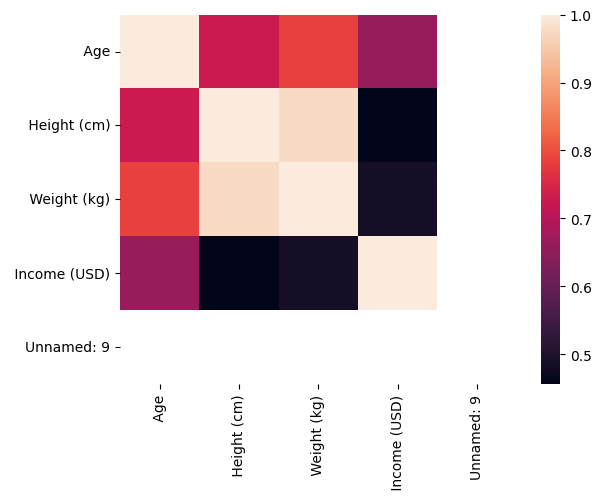

In [74]:
corr_df = base_df.corr().abs()
clean_corr_df = base_df.copy()
for key in corr_df:
    if sorted(corr_df[key])[-2] < 0.7:
        clean_corr_df = clean_corr_df.drop([key], axis=1)
clean_corr_df = clean_corr_df.corr().abs()
sns.heatmap(clean_corr_df)

Существует значительная корреляция между Весом и Возрастом, для нее и будем строить регрессию 

In [75]:
X = base_df[" Height (cm)"]
y = base_df[" Weight (kg)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = [[x] for x in X_train]
X_test = [[x] for x in X_test]
y_train = [[x] for x in y_train]
y_test = [[x] for x in y_test]

Text(0, 0.5, 'Predictions')

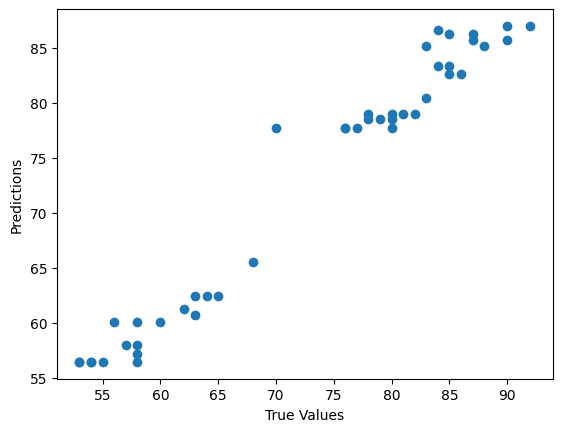

In [76]:
K = 20
knn = KNeighborsRegressor(n_neighbors=K, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [77]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1, 100, 5))}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
random_search = RandomizedSearchCV(knn, param_grid, cv=5, n_iter=3, random_state=42, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

grid_score = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
random_score = cross_val_score(random_search.best_estimator_, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

print("Best K for Grid Search: ", grid_search.best_params_)
print("Best K for Random Search: ", random_search.best_params_)
print("Grid Search CV Score: ", grid_score.mean())
print("Random Search CV Score: ", random_score.mean())

Best K for Grid Search:  {'n_neighbors': 6}
Best K for Random Search:  {'n_neighbors': 1}
Grid Search CV Score:  -6.766589506172838
Random Search CV Score:  -11.566666666666666


Text(0, 0.5, 'Predictions')

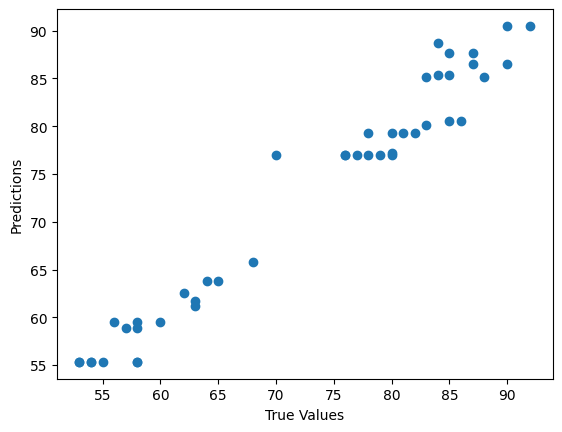

In [78]:
K = grid_search.best_params_["n_neighbors"]
knn = KNeighborsRegressor(n_neighbors=K, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse_perfect = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [79]:
print(mse_random, mse_perfect)

6.258920454545458 5.946969696969699
